In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

In [3]:
# functions
def f1(x, y):
    return (x - 2)**2 + (y - 2)**2 - 0.8 * np.cos(3 * x) + 0.7 * np.cos(5 * y)

def f2(x, y):
    return (x + 1)**2 + (y + 1)**2 - 0.5 * np.sin(3 * x) + 0.6 * np.sin(5 * y)

In [4]:
# Parwto
def dominates(p1, p2):
    f1_p1, f2_p1 = f1(*p1), f2(*p1)
    f1_p2, f2_p2 = f1(*p2), f2(*p2)
    return (f1_p1 <= f1_p2 and f2_p1 <= f2_p2) and (f1_p1 < f1_p2 or f2_p1 < f2_p2)

In [5]:
# Grid
def grid_pareto_front(grid_size=60):
    x_vals = np.linspace(-3, 3, grid_size)
    y_vals = np.linspace(-3, 3, grid_size)
    X, Y = np.meshgrid(x_vals, y_vals)

    non_dominated_points = []

    # Loop
    for i1 in range(grid_size):
        for j1 in range(grid_size):
            p1 = [X[i1, j1], Y[i1, j1]]
            dominated = False

            for i2 in range(grid_size):
                for j2 in range(grid_size):
                    p2 = [X[i2, j2], Y[i2, j2]]
                    if dominates(p2, p1):
                        dominated = True
                        break
                if dominated:
                    break

            if not dominated:
                non_dominated_points.append([f1(*p1), f2(*p1)])

    return np.array(non_dominated_points)

In [6]:
def genetic_algorithm_pareto(population_size=200, generations=300):
    def multi_obj(xy):
        return [f1(xy[0], xy[1]), f2(xy[0], xy[1])]

    # differential evolution
    result = differential_evolution(
        lambda xy: sum(multi_obj(xy)),  
        bounds=[(-3, 3), (-3, 3)],
        strategy="best1bin",
        popsize=population_size,
        maxiter=generations,
        disp=True
    )

    pareto_points = [multi_obj(result.x)]
    return np.array(pareto_points)

In [7]:
# Plot
def visualize_pareto():
    grid_points = grid_pareto_front()
    ga_points = genetic_algorithm_pareto()
    plt.figure(figsize=(10, 6))
    plt.scatter(grid_points[:, 0], grid_points[:, 1], c='green', label="GM", alpha=0.7)
    plt.scatter(ga_points[:, 0], ga_points[:, 1], c='blue', label="GA", alpha=0.7)
    plt.xlabel("f1")
    plt.ylabel("f2")
    plt.title("Parrto Front")
    plt.legend()
    plt.grid(True)
    plt.show()

differential_evolution step 1: f(x)= 7.427277870977637
differential_evolution step 2: f(x)= 7.427277870977637
differential_evolution step 3: f(x)= 7.427277870977637
differential_evolution step 4: f(x)= 7.39859146545745
differential_evolution step 5: f(x)= 7.395301174890488
differential_evolution step 6: f(x)= 7.39353245611041
differential_evolution step 7: f(x)= 7.39353245611041
differential_evolution step 8: f(x)= 7.392428167187523
differential_evolution step 9: f(x)= 7.392428167187523
differential_evolution step 10: f(x)= 7.392428167187523
differential_evolution step 11: f(x)= 7.392428167187523
Polishing solution with 'L-BFGS-B'


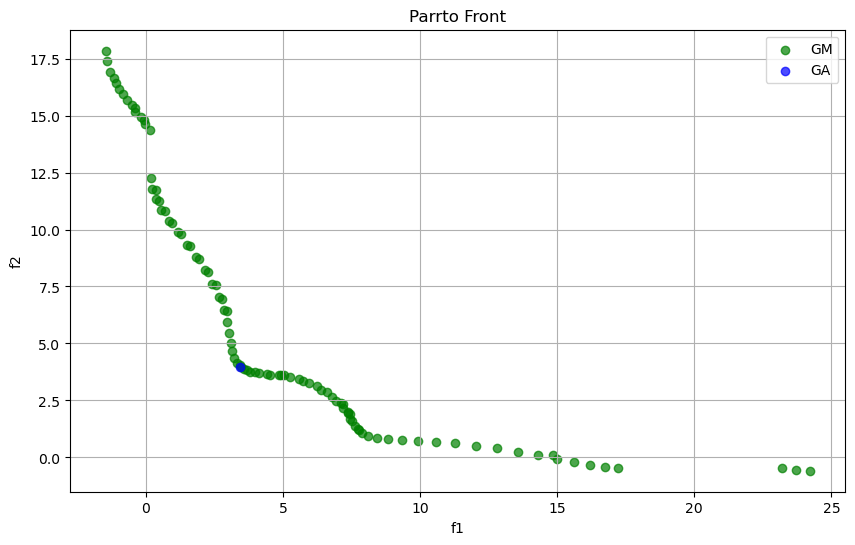

In [8]:
visualize_pareto()